In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import torch.nn.functional as F
from torch.utils.data.sampler import SubsetRandomSampler
import torch.optim as optim
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Define the paths to the Train and Test zip folders
train_zip_path = '/content/drive/My Drive/Colab Notebooks/dataset/upper_train.zip'
test_zip_path = '/content/drive/My Drive/Colab Notebooks/dataset/upper_test.zip'

# Unzip the Train and Test folders
import zipfile

with zipfile.ZipFile(train_zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/train')

with zipfile.ZipFile(test_zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/test')


train_dir = '/content/train/upper modifier train'
test_dir = '/content/test/upper modifier test'

In [4]:
len(os.listdir('/content/train/upper modifier train'))#30

10

In [5]:
len(os.listdir('/content/test/upper modifier test'))#30


10

In [6]:
classes = os.listdir(train_dir)
print(len(classes))
classes

10


['0x0930,0x094D',
 '0x093C',
 '0x0945',
 '0x0948',
 '0x0901',
 '0x0947',
 '0x0930,0x094D,0x0902',
 '0x0902',
 '0x093F',
 '0x0947,0x0930,0x094D']

In [7]:
train_transform = transforms.Compose([
   # transforms.RandomRotation(10),
    #transforms.RandomAffine(degrees=45, translate=(0.1, 0.1), scale=(0.8, 1.2)),
    transforms.RandomCrop(64),
    transforms.ToTensor(),
    transforms.Normalize((0.5, ), (0.5, ))
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, ), (0.5, ))
])

train_data = datasets.ImageFolder(train_dir, transform=train_transform)
test_data = datasets.ImageFolder(test_dir, transform=train_transform)

# print out some data stats
print('Num training images: ', len(train_data))
print('Num test images: ', len(test_data))

Num training images:  8478
Num test images:  2123


In [8]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import cv2
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import PIL
import pathlib

In [9]:
classes = os.listdir(train_dir)
num_classes=len(classes)
print(classes)
print(num_classes)

['0x0930,0x094D', '0x093C', '0x0945', '0x0948', '0x0901', '0x0947', '0x0930,0x094D,0x0902', '0x0902', '0x093F', '0x0947,0x0930,0x094D']
10


In [10]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(28, 28),
  batch_size=22)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(28, 28),
  batch_size=22)

Found 8478 files belonging to 10 classes.
Using 6783 files for training.
Found 2123 files belonging to 10 classes.
Using 424 files for validation.


In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(first_image.shape)

(28, 28, 3)


In [12]:
batch_size = 22

In [13]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(28, 28, 3)),

    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),

    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),

    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),

    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Use early stopping to prevent overfitting


# Increase the number of epochs
epochs = 100



In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 28, 28, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                        

In [15]:
early_stopping = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history=model.fit(train_ds,validation_data=val_ds, epochs=epochs,callbacks=[early_stopping])

Epoch 1/100
309/309 [==============================] - 14s 7ms/step - loss: 2.2307 - accuracy: 0.1405 - val_loss: 2.1171 - val_accuracy: 0.1958
Epoch 2/100
309/309 [==============================] - 2s 7ms/step - loss: 1.7112 - accuracy: 0.3665 - val_loss: 1.2047 - val_accuracy: 0.5307
Epoch 3/100
309/309 [==============================] - 2s 6ms/step - loss: 0.8561 - accuracy: 0.6705 - val_loss: 0.5921 - val_accuracy: 0.7618
Epoch 4/100
309/309 [==============================] - 2s 5ms/step - loss: 0.4934 - accuracy: 0.8240 - val_loss: 0.5344 - val_accuracy: 0.8208
Epoch 5/100
309/309 [==============================] - 2s 5ms/step - loss: 0.3374 - accuracy: 0.8822 - val_loss: 0.3932 - val_accuracy: 0.8325
Epoch 6/100
309/309 [==============================] - 2s 5ms/step - loss: 0.2281 - accuracy: 0.9219 - val_loss: 0.3742 - val_accuracy: 0.8703
Epoch 7/100
309/309 [==============================] - 2s 5ms/step - loss: 0.1999 - accuracy: 0.9309 - val_loss: 0.4435 - val_accuracy: 0.860

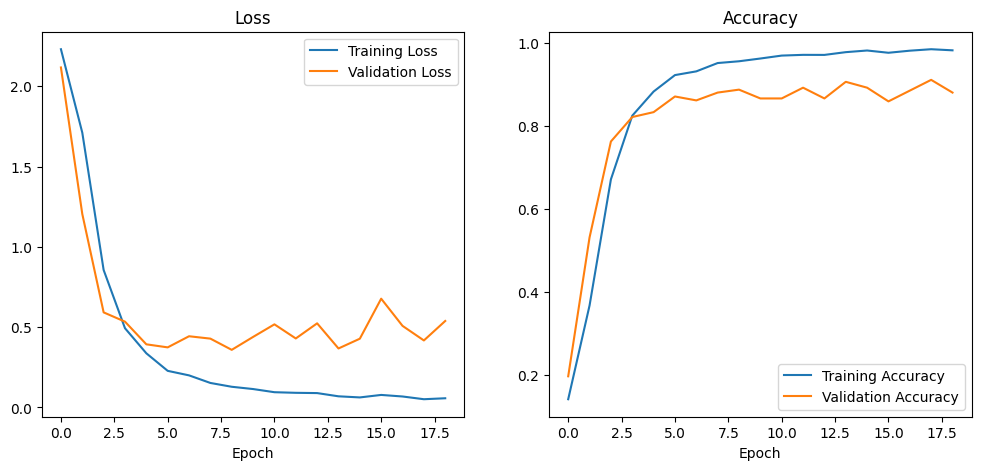

In [16]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create plots for loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.title('Loss')

# Create plots for accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.title('Accuracy')

plt.show()

In [17]:
model.save('/content/drive/My Drive/Colab Notebooks/uprun3.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
